## Kaggle – DataTops®
Tu profe ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a tu profe a mejorar ese modelo?

## Métrica: 
El error cuadrático medio (RMSE, por sus siglas en inglés) es una medida de la desviación estándar de los residuos (errores de predicción). Los residuos representan la diferencia entre los valores observados y los valores predichos por el modelo. El RMSE indica qué tan dispersos están estos errores: cuanto menor es el RMSE, más cercanas están las predicciones a los valores reales. En otras palabras, el RMSE mide qué tan bien se ajusta la línea de regresión a los datos.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## 1. Librerías

In [73]:
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import urllib.request
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

## 2. Datos

In [49]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv(r"C:\Users\segur\Desktop\Data Science SL - The Bridge Repositorios\ONLINE_DS_THEBRIDGE_SL\Sprint_12\Lonely_Challenge\data\train.csv", 
                       index_col = "laptop_ID")

df.index.name = None

### 2.1 Exploración de los datos

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [51]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [52]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [53]:
df.describe()

,Inches,Price_in_euros
count,912.000000,912.000000
mean,14.981579,1111.724090
std,1.436719,687.959172
min,10.100000,174.000000
25%,14.000000,589.000000
50%,15.600000,978.000000
75%,15.600000,1483.942500
max,18.400000,6099.000000


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [55]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [56]:
df["Ram"].value_counts()

Ram
8GB     434
4GB     267
16GB    136
6GB      24
2GB      20
12GB     19
32GB     10
64GB      1
24GB      1
Name: count, dtype: int64

In [57]:
df["Weight"].value_counts()

Weight
2.2kg     91
2.1kg     40
2.4kg     31
2.5kg     29
2.3kg     27
          ..
3.31kg     1
0.97kg     1
2.34kg     1
1.11kg     1
4.33kg     1
Name: count, Length: 165, dtype: int64

In [58]:
df["ram_gb"] = df["Ram"].str.replace("GB","").astype(float)
df["weight_kg"] = df["Weight"].str.replace("kg","").astype(float)


In [12]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8.0,1.86
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16.0,2.59
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8.0,2.04
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8.0,1.34
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4.0,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00,8.0,2.20
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00,8.0,1.48
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00,8.0,2.20
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00,4.0,1.86


In [13]:
def cardinalidad(df_in, umbral_categoria, umbral_countinua):
    '''
    Esta función obtiene la cardinalidad de cada una de las variables y en función de dicha cardinalidad sugiere un tipo de variable.
    Los tipos posibles son: binaria, categórica, numérica discreta y numérica continua.
    Nota: los tipos mostrados en el DataFrame que retorna la función son solo una sugerencia, es mejor guardar el DataFrame en una variable y modificar los tipos si es necesario.

    
    Argumentos:
    
    df_in (pd.DataFrame): dataset en formato DataFrame para clasificar sus variables.

    umbral_categoría (int): número máximo de valores únicos para clasificar una variable como categórica.

    umbral_continua (int): porcentaje mínimo de valores únicos que debe tener una variable para clasificarla como numérica continua.

    
    Retorna:

    pd.DataFrame: DataFrame con 4 columnas: nombre de la variable, cardinalidad, porcentaje de valores únicos y tipo sugerido
    '''


    cardinalidad = [df_in[col].nunique() for col in df_in.columns]
    cardinalidad_por = [df_in[col].nunique()/len(df_in[col]) for col in df_in.columns]
    dict_df = {"nombre_variable": df_in.columns, "valores_unicos": cardinalidad, "cardinalidad": cardinalidad_por}
    nuevo_df = pd.DataFrame(dict_df)
    nuevo_df["tipo_sugerido"] = "Categórica"
    nuevo_df.loc[nuevo_df["valores_unicos"] == 2, "tipo_sugerido"] = "Binaria"
    nuevo_df.loc[nuevo_df["valores_unicos"] >= umbral_categoria, "tipo_sugerido"] = "Numerica Discreta"
    nuevo_df.loc[nuevo_df["cardinalidad"] >= umbral_countinua, "tipo_sugerido"] = "Numerica Continua"
    return nuevo_df

In [14]:
cardinalidad(df, 10, 0.3)

,nombre_variable,valores_unicos,cardinalidad,tipo_sugerido
0,Company,19,0.020833,Numerica Discreta
1,Product,480,0.526316,Numerica Continua
2,TypeName,6,0.006579,Categórica
3,Inches,17,0.018640,Numerica Discreta
4,ScreenResolution,36,0.039474,Numerica Discreta
5,Cpu,107,0.117325,Numerica Discreta
6,Ram,9,0.009868,Categórica
7,Memory,37,0.040570,Numerica Discreta
8,Gpu,93,0.101974,Numerica Discreta
9,OpSys,9,0.009868,Categórica


In [15]:
df

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros,ram_gb,weight_kg
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00,8.0,1.86
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01,16.0,2.59
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00,8.0,2.04
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,8.0,1.34
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00,4.0,2.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00,8.0,2.20
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00,8.0,1.48
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00,8.0,2.20
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00,4.0,1.86


In [16]:
#Quiero eliminar la variable Product. Quiero utilizar Random Forest y tener tantos valores Unicos me va a crear Overtfitting por la cantidad de arboles

### 2.3 Definir X e y

In [64]:
features = [
    'Company', 'TypeName', 'Inches', 'ScreenResolution',
    'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight'
]

target = 'Price_in_euros'

In [65]:
X = df[features]
y = df[target]

X.shape

(912, 10)

In [66]:
X

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
755,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg
618,Dell,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg
909,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg
2,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg
286,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg
...,...,...,...,...,...,...,...,...,...,...
28,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg
1160,HP,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg
78,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg
23,HP,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg


In [67]:
X.shape

(912, 10)

In [69]:
y.shape

(912,)

### 2.4 Dividir X_train, X_test, y_train, y_test

In [94]:
X_cat = X.select_dtypes(include='object')
X_num = X.select_dtypes(exclude='object')

In [97]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_cat_encoded = encoder.fit_transform(X_cat)

In [98]:
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [101]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)


ValueError: could not convert string to float: 'HP'

## 3. Procesado de datos

Nuestro target es la columna `Price_in_euros`

-----------------------------------------------------------------------------------------------------------------

## 4. Modelado

### 4.1 Baseline de modelos


### 4.2 Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [80]:
y_pred = pipeline.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

353.5444015109375

### 4.3 Optimización (up to you 🫰🏻)

In [32]:
#Ajustamos parametros con GRIDSEARCH

param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "max_features": ['sqrt', 'log2', None]

}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3)
grid.fit(X, y)

print("Mejores parámetros:", grid.best_params_)

Mejores parámetros: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [33]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2],
    "max_features": ['sqrt', 'log2', None]
}

grid = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,  
    scoring='neg_root_mean_squared_error',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid.fit(X, y)

print("Mejores parámetros encontrados:", grid.best_params_)
print("Mejor RMSE (negativo):", grid.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Mejores parámetros encontrados: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Mejor RMSE (negativo): -306.7401588245769


In [34]:
best_rf = RandomForestRegressor(
    max_depth=10,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

best_rf.fit(X_train, y_train)

# Predecir
y_pred = best_rf.predict(X_val)

# Calcular RMSE
rmse2 = np.sqrt(mean_squared_error(y_val, y_pred))
print("VALOR RMSE:", rmse2)

VALOR RMSE: 379.23401580168684


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

## 1. Carga los datos de `test.csv` para predecir.


In [81]:
df_test = pd.read_csv(r"C:\Users\segur\Desktop\Data Science SL - The Bridge Repositorios\ONLINE_DS_THEBRIDGE_SL\Sprint_12\Lonely_Challenge\data\test.csv", 
                       index_col = "laptop_ID")
df_test.index.name = None

In [82]:
df_test.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [83]:
df_test.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    object 
 7   Memory            391 non-null    object 
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    object 
 10  Weight            391 non-null    object 
dtypes: float64(1), object(10)
memory usage: 36.7+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [85]:
# 2. Transformar Ram y Weight
df_test["ram_gb"] = df_test["Ram"].str.replace("GB", "").astype(float)
df_test["weight_kg"] = df_test["Weight"].str.replace("kg", "").astype(float)

In [86]:
df_test

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,ram_gb,weight_kg
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg,16.0,2.400
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg,4.0,2.400
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg,4.0,1.900
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg,8.0,2.191
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg,4.0,1.950
...,...,...,...,...,...,...,...,...,...,...,...,...,...
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg,16.0,2.900
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg,4.0,1.470
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg,8.0,1.780
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg,4.0,1.640


In [ ]:
X_2 = df_test[features]
y_2 = df_test[target]



In [87]:
cat_cols = X_2.select_dtypes(include='object').columns.tolist()
num_cols = X_2.select_dtypes(exclude='object').columns.tolist()

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])
pipeline = Pipeline(steps=[
    ('preprocessing', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

In [88]:
X_2 = X_2.reindex(columns=X_train.columns, fill_value=0)


In [43]:
y_pred_2 = modelo_rf.predict(X_2)
y_pred_2 


array([1383.31646667,  320.37120952,  361.39844468,  937.67403333,
       1079.43713333,  525.79449762,  638.14388333,  722.0666    ,
       1350.6011    ,  464.086     , 2326.43371429, 1472.51382381,
        594.75496429, 1603.3179    ,  793.86094667,  464.66197333,
       3385.2207    , 1283.01      , 1803.0377    ,  459.36604333,
       1512.093     ,  421.19176667,  686.58655714, 1277.54053333,
        474.08493333,  726.93268929,  685.37755714,  622.72459667,
       2614.63887833,  967.55211   , 2027.947     ,  472.68071429,
        909.55716833, 3376.85868   , 2071.0778    , 1911.36870346,
        581.52902619, 1323.5552    ,  736.5856    , 1602.5731    ,
        613.72614286, 1097.86176667,  597.33630833, 1032.88383   ,
       1401.0075    ,  991.92619603,  824.93477738,  352.87975   ,
        474.22990595,  346.16812143, 1913.3326    ,  641.19391429,
       1193.79099333,  398.30904848, 1678.36386667, 1885.8496    ,
        444.93582381,  666.04066667, 1032.09      ,  803.33258

In [44]:
predictions_submit = modelo_rf.predict(X_2)
predictions_submit

array([1383.31646667,  320.37120952,  361.39844468,  937.67403333,
       1079.43713333,  525.79449762,  638.14388333,  722.0666    ,
       1350.6011    ,  464.086     , 2326.43371429, 1472.51382381,
        594.75496429, 1603.3179    ,  793.86094667,  464.66197333,
       3385.2207    , 1283.01      , 1803.0377    ,  459.36604333,
       1512.093     ,  421.19176667,  686.58655714, 1277.54053333,
        474.08493333,  726.93268929,  685.37755714,  622.72459667,
       2614.63887833,  967.55211   , 2027.947     ,  472.68071429,
        909.55716833, 3376.85868   , 2071.0778    , 1911.36870346,
        581.52902619, 1323.5552    ,  736.5856    , 1602.5731    ,
        613.72614286, 1097.86176667,  597.33630833, 1032.88383   ,
       1401.0075    ,  991.92619603,  824.93477738,  352.87975   ,
        474.22990595,  346.16812143, 1913.3326    ,  641.19391429,
       1193.79099333,  398.30904848, 1678.36386667, 1885.8496    ,
        444.93582381,  666.04066667, 1032.09      ,  803.33258

**¡OJO! ¿Por qué me da error?** 

IMPORTANTE:

- SI EL ARRAY CON EL QUE HICISTEIS `.fit()` ERA DE 4 COLUMNAS, PARA `.predict()` DEBEN SER LAS MISMAS
- SI AL ARRAY CON EL QUE HICISTEIS `.fit()` LO NORMALIZASTEIS, PARA `.predict()` DEBÉIS NORMALIZARLO
- TODO IGUAL SALVO **BORRAR FILAS**, EL NÚMERO DE ROWS SE DEBE MANTENER EN ESTE SET, PUES LA PREDICCIÓN DEBE TENER **391 FILAS**, SI O SI

**Entonces, si al cargar los datos de ``train.csv`` usaste `index_col=0`, ¿tendré que hacer lo también para el `test.csv`?**

In [ ]:
# ¿Qué opináis?
# ¿Sí, no?

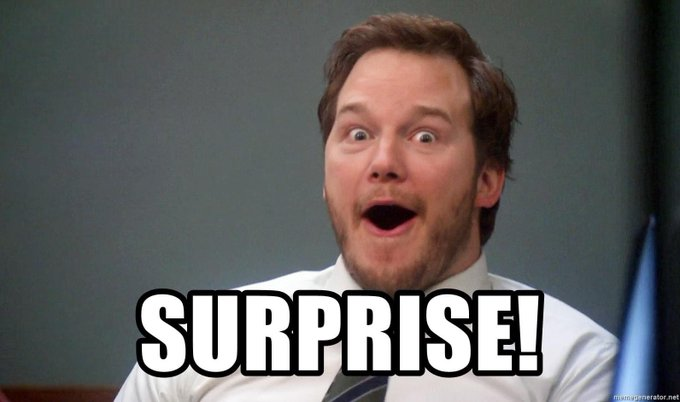

## 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [263]:
sample = pd.read_csv(r"C:\Users\segur\Desktop\Data Science SL - The Bridge Repositorios\ONLINE_DS_THEBRIDGE_SL\Sprint_12\Lonely_Challenge\data\sample_submission.csv")

In [264]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [265]:
sample.shape

(391, 2)

## 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [270]:
#¿Cómo creamos la submission?
submission_v2_rf = pd.DataFrame({ "laptop_ID":X_2.index,
                           "Price_in_euros": predictions_submit })

In [271]:
submission_v2_rf.head()

,laptop_ID,Price_in_euros
0,209,1383.316467
1,1281,320.371210
2,1168,361.398445
3,1231,937.674033
4,1020,1079.437133


In [272]:
submission_v2_rf.shape

(391, 2)

## 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [273]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                df_to_submit.to_csv("submission_v2_rf.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [274]:
chequeador(submission_v2_rf)

You're ready to submit!
